<a href="https://colab.research.google.com/github/Sievv/AMPs-against-KP/blob/main/KP_balance_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load your original features and target.

Combine them to one DataFrame.

Perform random undersampling on the majority class (Inactive).

Save the balanced dataset back.

Original class distribution:
Target
0    298
1    110

In [28]:
import pandas as pd
from sklearn.utils import resample
import os

# Step 1: Load your training features and target
X_train = pd.read_csv('/content/drive/MyDrive/KP/KP balance/X_train.csv')  # Features
y_train = pd.read_csv('/content/drive/MyDrive/KP/KP balance/y_train.csv').squeeze()  # Target as Series

# Step 2: Combine features and target for easier manipulation
train_data = X_train.copy()
train_data['Target'] = y_train

# Step 3: Show original class distribution
print("Original class distribution:")
print(train_data['Target'].value_counts())

# Step 4: Separate majority and minority classes
majority = train_data[train_data['Target'] == 0]  # Inactive
minority = train_data[train_data['Target'] == 1]  # Active

# Step 5: Downsample majority to minority class size
majority_downsampled = resample(
    majority,
    replace=False,
    n_samples=len(minority),
    random_state=42
)

# Step 6: Combine minority class with downsampled majority class
balanced_data = pd.concat([minority, majority_downsampled])

# Step 7: Shuffle the balanced dataset
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 8: Show new class distribution
print("\nBalanced class distribution:")
print(balanced_data['Target'].value_counts())

# Step 9: Separate features and target again
X_balanced = balanced_data.drop(columns=['Target'])
y_balanced = balanced_data['Target']

# Step 10: Ensure save directory exists
save_dir = '/content/drive/MyDrive/KP/KP balance'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Step 11: Save balanced datasets
X_balanced.to_csv(f'{save_dir}/X_train_balanced.csv', index=False)
y_balanced.to_csv(f'{save_dir}/y_train_balanced.csv', index=False)

print("\nBalanced datasets saved as 'X_train_balanced.csv' and 'y_train_balanced.csv' in the directory:", save_dir)


Original class distribution:
Target
0    298
1    110
Name: count, dtype: int64

Balanced class distribution:
Target
0    110
1    110
Name: count, dtype: int64

Balanced datasets saved as 'X_train_balanced.csv' and 'y_train_balanced.csv' in the directory: /content/drive/MyDrive/KP/KP balance


In [29]:
import pandas as pd

X_balanced = pd.read_csv('/content/drive/MyDrive/KP/KP balance/X_train_balanced.csv')
y_balanced = pd.read_csv('/content/drive/MyDrive/KP/KP balance/y_train_balanced.csv').squeeze()


Build Model

In [32]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Load balanced data
X_balanced = pd.read_csv('/content/drive/MyDrive/KP/KP balance/X_train_balanced.csv')
y_balanced = pd.read_csv('/content/drive/MyDrive/KP/KP balance/y_train_balanced.csv').squeeze()

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42),
    'LightGBM': lgb.LGBMClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_balanced, y_balanced)
    y_pred = model.predict(X_balanced)

    print(f"\n{name} - Confusion Matrix:")
    print(confusion_matrix(y_balanced, y_pred))

    print(f"\n{name} - Classification Report:")
    print(classification_report(y_balanced, y_pred))
    print('-' * 60)


Training Random Forest...

Random Forest - Confusion Matrix:
[[110   0]
 [  0 110]]

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       110

    accuracy                           1.00       220
   macro avg       1.00      1.00      1.00       220
weighted avg       1.00      1.00      1.00       220

------------------------------------------------------------
Training Gradient Boosting...

Gradient Boosting - Confusion Matrix:
[[110   0]
 [  0 110]]

Gradient Boosting - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       110

    accuracy                           1.00       220
   macro avg       1.00      1.00      1.00       220
weighted avg       1.00      1.00      1.00       220

-------------------------

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:27:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training Random Forest...
Training Gradient Boosting...
Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:53:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training LightGBM...
[LightGBM] [Info] Number of positive: 110, number of negative: 110
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 932
[LightGBM] [Info] Number of data points in the train set: 220, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

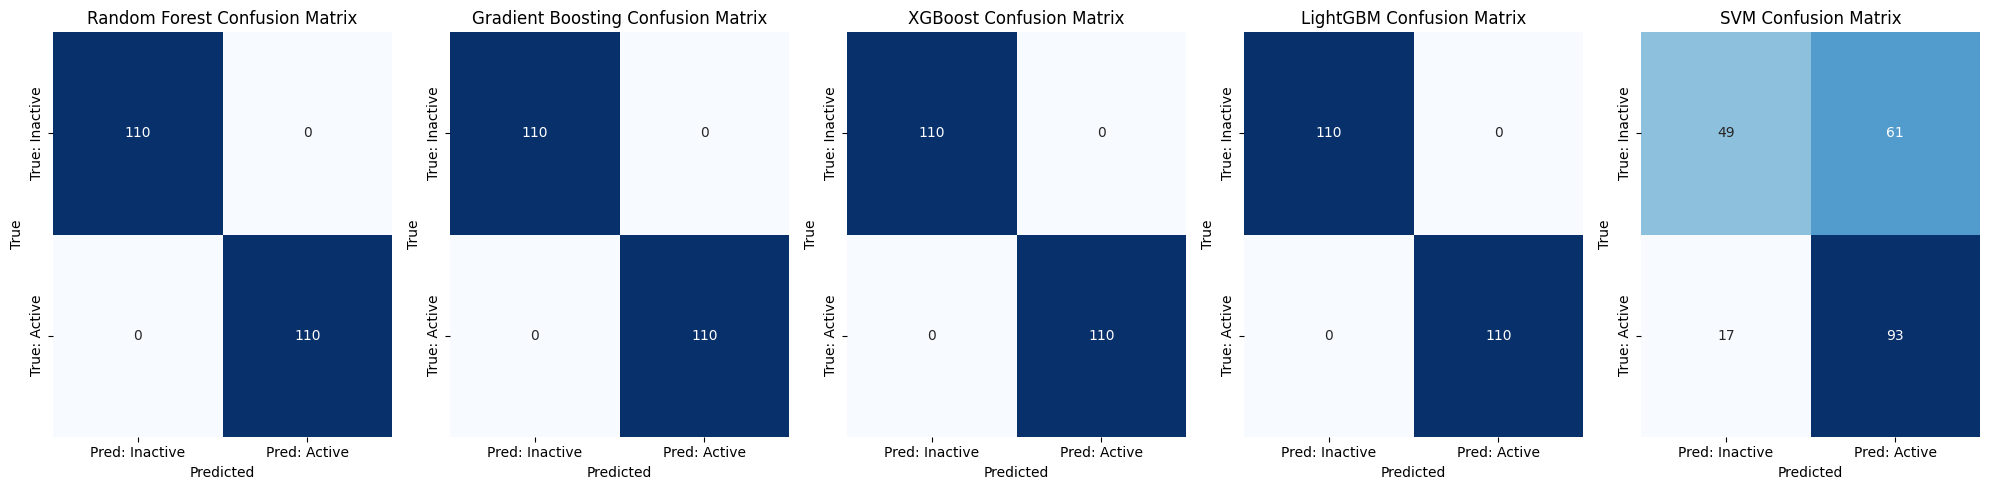

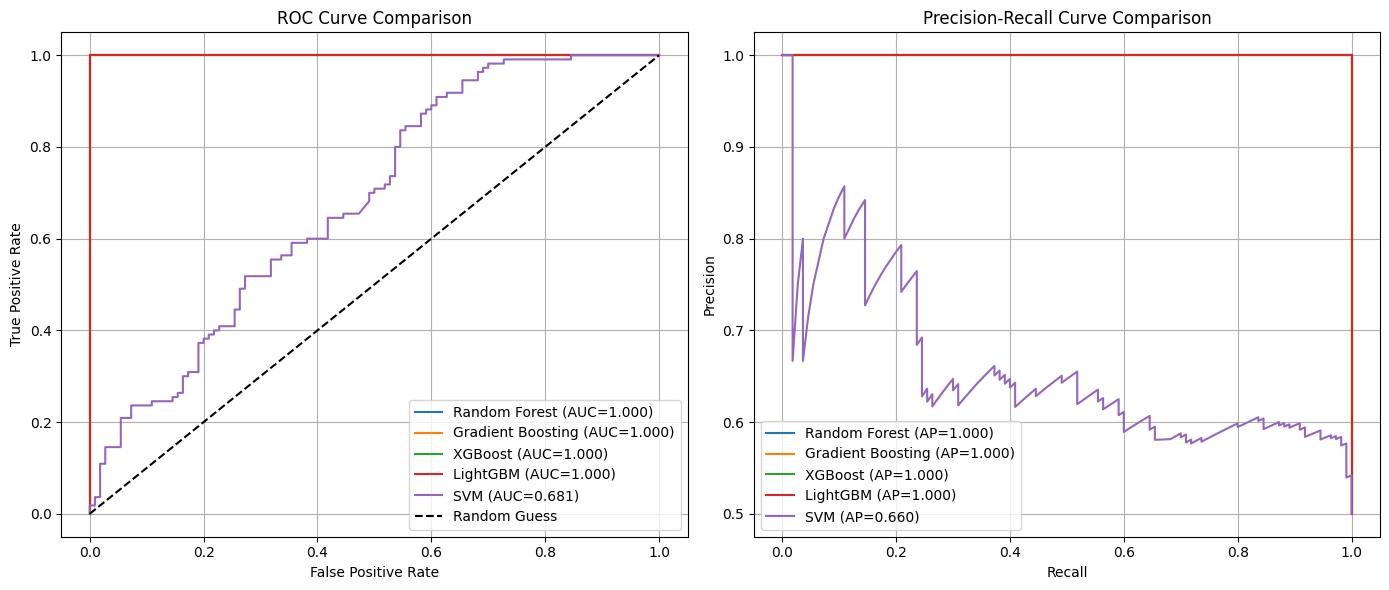

               Model  Accuracy       MCC   ROC AUC    PR AUC
0      Random Forest  1.000000  1.000000  1.000000  1.000000
1  Gradient Boosting  1.000000  1.000000  1.000000  1.000000
2            XGBoost  1.000000  1.000000  1.000000  1.000000
3           LightGBM  1.000000  1.000000  1.000000  1.000000
4                SVM  0.645455  0.317408  0.680826  0.659682


In [66]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.metrics import (
    classification_report, confusion_matrix,
    roc_auc_score, average_precision_score,
    roc_curve, precision_recall_curve,
    matthews_corrcoef, accuracy_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load balanced data
X_balanced = pd.read_csv('/content/drive/MyDrive/KP/KP balance/X_train_balanced.csv')
y_balanced = pd.read_csv('/content/drive/MyDrive/KP/KP balance/y_train_balanced.csv').squeeze()

# Define models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42),
    'LightGBM': lgb.LGBMClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

metrics = {
    'Model': [],
    'Accuracy': [],
    'MCC': [],
    'ROC AUC': [],
    'PR AUC': []
}

# Train models and predict on train data (for demonstration)
y_true = y_balanced

# Prepare plot for confusion matrices
fig_cm, axes_cm = plt.subplots(1, len(models), figsize=(20, 5))

# Prepare ROC and PR curves plot
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.subplot(1, 2, 2)
plt.title('Precision-Recall Curve Comparison')
plt.xlabel('Recall')
plt.ylabel('Precision')

for idx, (name, model) in enumerate(models.items()):
    print(f"Training {name}...")
    model.fit(X_balanced, y_balanced)

    y_pred = model.predict(X_balanced)
    y_prob = model.predict_proba(X_balanced)[:, 1]

    # Metrics calculation
    acc = accuracy_score(y_true, y_pred)
    mcc = matthews_corrcoef(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_prob)
    pr_auc = average_precision_score(y_true, y_prob)

    metrics['Model'].append(name)
    metrics['Accuracy'].append(acc)
    metrics['MCC'].append(mcc)
    metrics['ROC AUC'].append(roc_auc)
    metrics['PR AUC'].append(pr_auc)

    # Plot confusion matrix side-by-side
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Pred: Inactive', 'Pred: Active'],
                yticklabels=['True: Inactive', 'True: Active'],
                ax=axes_cm[idx])
    axes_cm[idx].set_title(f'{name} Confusion Matrix')
    axes_cm[idx].set_xlabel('Predicted')
    axes_cm[idx].set_ylabel('True')

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f'{name} (AUC={roc_auc:.3f})')

    # Plot PR curve
    precision, recall, _ = precision_recall_curve(y_true, y_prob)
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, label=f'{name} (AP={pr_auc:.3f})')

plt.tight_layout()
fig_cm.tight_layout()

plt.subplot(1, 2, 1)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Display performance metrics table
metrics_df = pd.DataFrame(metrics)
print(metrics_df)


Compare Model

Training Random Forest...

Random Forest - Confusion Matrix:
[[110   0]
 [  0 110]]

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       110

    accuracy                           1.00       220
   macro avg       1.00      1.00      1.00       220
weighted avg       1.00      1.00      1.00       220

------------------------------------------------------------
Training Gradient Boosting...

Gradient Boosting - Confusion Matrix:
[[110   0]
 [  0 110]]

Gradient Boosting - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       110

    accuracy                           1.00       220
   macro avg       1.00      1.00      1.00       220
weighted avg       1.00      1.00      1.00       220

-------------------------

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:57:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.74      0.45      0.56       110
           1       0.60      0.85      0.70       110

    accuracy                           0.65       220
   macro avg       0.67      0.65      0.63       220
weighted avg       0.67      0.65      0.63       220

------------------------------------------------------------


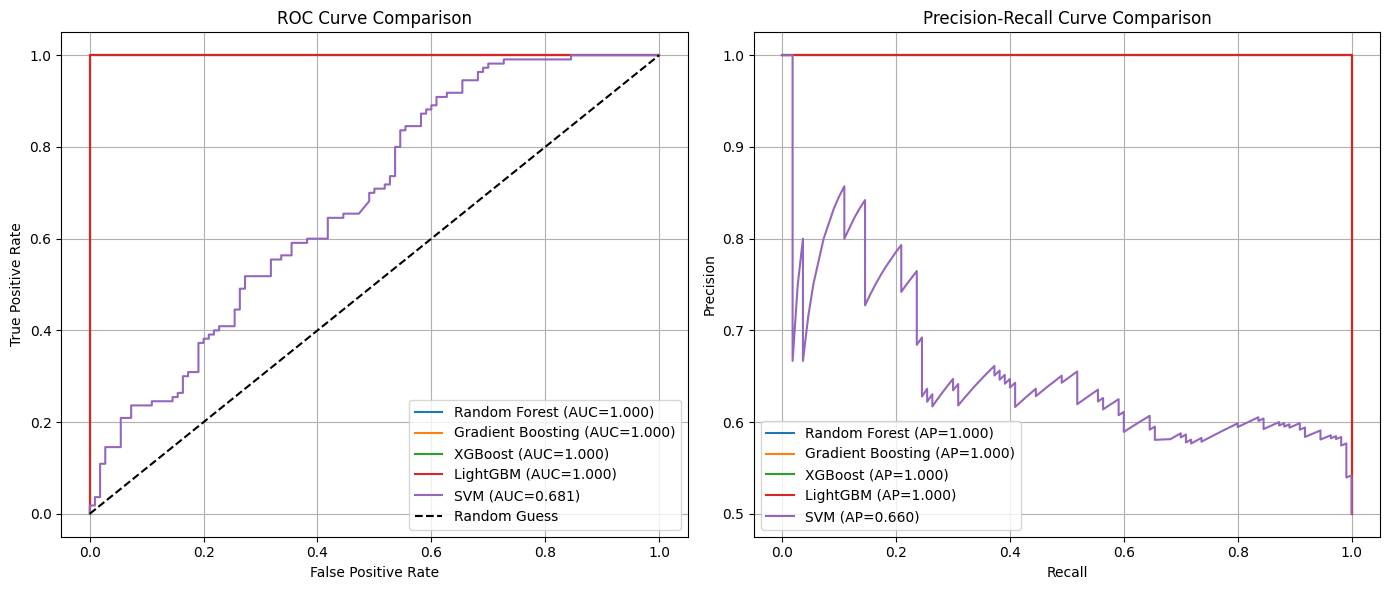

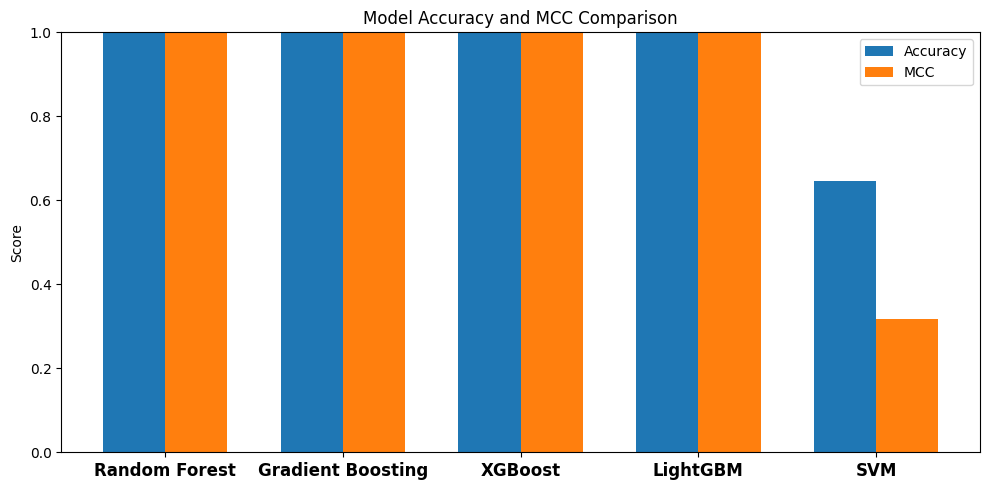

In [67]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.metrics import (
    classification_report, confusion_matrix,
    roc_auc_score, average_precision_score,
    roc_curve, precision_recall_curve,
    matthews_corrcoef, accuracy_score
)
import matplotlib.pyplot as plt
import numpy as np

# Load balanced data
X_balanced = pd.read_csv('/content/drive/MyDrive/KP/KP balance/X_train_balanced.csv')
y_balanced = pd.read_csv('/content/drive/MyDrive/KP/KP balance/y_train_balanced.csv').squeeze()

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42),
    'LightGBM': lgb.LGBMClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

# Train models and collect metrics
metrics = {
    'Model': [],
    'Accuracy': [],
    'MCC': [],
    'ROC AUC': [],
    'PR AUC': []
}

plt.figure(figsize=(14, 6))

# For ROC curve plot
plt.subplot(1, 2, 1)
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# For PR curve plot
plt.subplot(1, 2, 2)
plt.title('Precision-Recall Curve Comparison')
plt.xlabel('Recall')
plt.ylabel('Precision')

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_balanced, y_balanced)
    y_pred = model.predict(X_balanced)
    y_prob = model.predict_proba(X_balanced)[:, 1]

    # Confusion matrix and classification report
    print(f"\n{name} - Confusion Matrix:")
    print(confusion_matrix(y_balanced, y_pred))
    print(f"\n{name} - Classification Report:")
    print(classification_report(y_balanced, y_pred))
    print('-' * 60)

    # Calculate metrics
    acc = accuracy_score(y_balanced, y_pred)
    mcc = matthews_corrcoef(y_balanced, y_pred)
    roc_auc = roc_auc_score(y_balanced, y_prob)
    pr_auc = average_precision_score(y_balanced, y_prob)

    metrics['Model'].append(name)
    metrics['Accuracy'].append(acc)
    metrics['MCC'].append(mcc)
    metrics['ROC AUC'].append(roc_auc)
    metrics['PR AUC'].append(pr_auc)

    # ROC curve
    fpr, tpr, _ = roc_curve(y_balanced, y_prob)
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f'{name} (AUC={roc_auc:.3f})')

    # Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_balanced, y_prob)
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, label=f'{name} (AP={pr_auc:.3f})')

# Finalize ROC and PR curve plots
plt.subplot(1, 2, 1)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Plot bar charts for MCC and Accuracy
metrics_df = pd.DataFrame(metrics)

plt.figure(figsize=(10, 5))
width = 0.35
x = np.arange(len(metrics_df))

plt.bar(x - width/2, metrics_df['Accuracy'], width, label='Accuracy')
plt.bar(x + width/2, metrics_df['MCC'], width, label='MCC')

plt.xticks(x, metrics_df['Model'], fontsize=12, fontweight='bold')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Model Accuracy and MCC Comparison')
plt.legend()
plt.tight_layout()
plt.show()


Predict with test set


Random Forest Test Accuracy: 0.9320
              precision    recall  f1-score   support

           0       0.95      0.96      0.95        75
           1       0.89      0.86      0.87        28

    accuracy                           0.93       103
   macro avg       0.92      0.91      0.91       103
weighted avg       0.93      0.93      0.93       103


Gradient Boosting Test Accuracy: 0.9223
              precision    recall  f1-score   support

           0       0.97      0.92      0.95        75
           1       0.81      0.93      0.87        28

    accuracy                           0.92       103
   macro avg       0.89      0.92      0.91       103
weighted avg       0.93      0.92      0.92       103


XGBoost Test Accuracy: 0.9417
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        75
           1       0.87      0.93      0.90        28

    accuracy                           0.94       103
   macro avg       

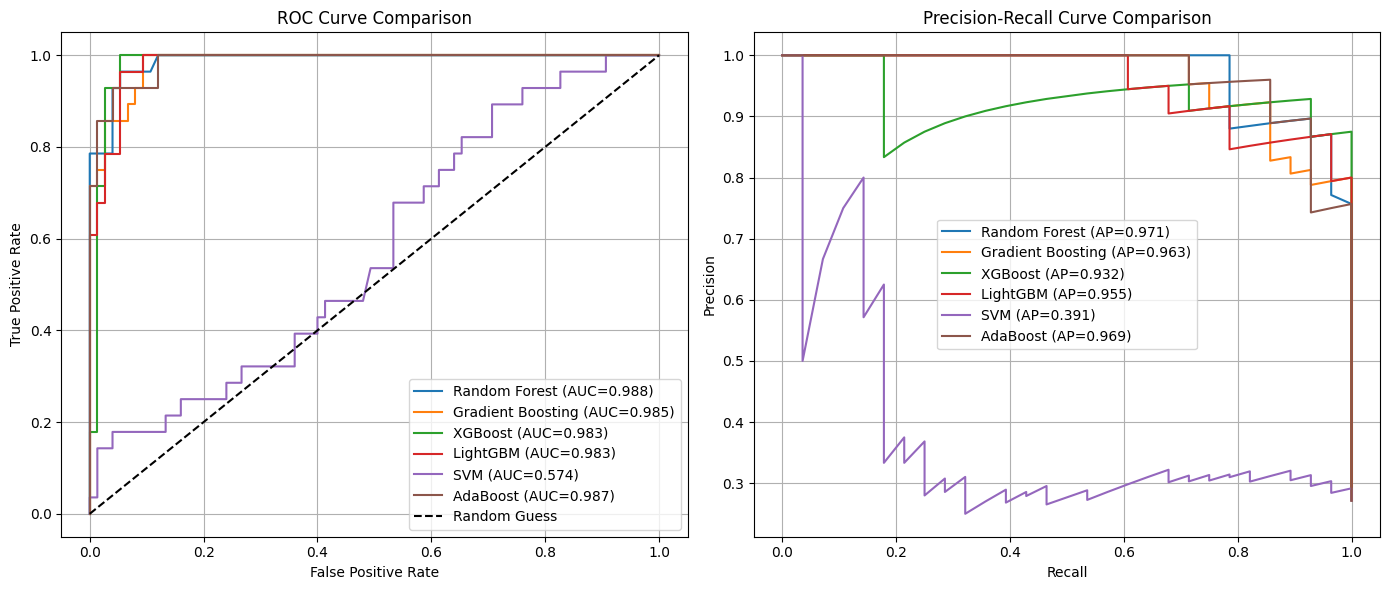

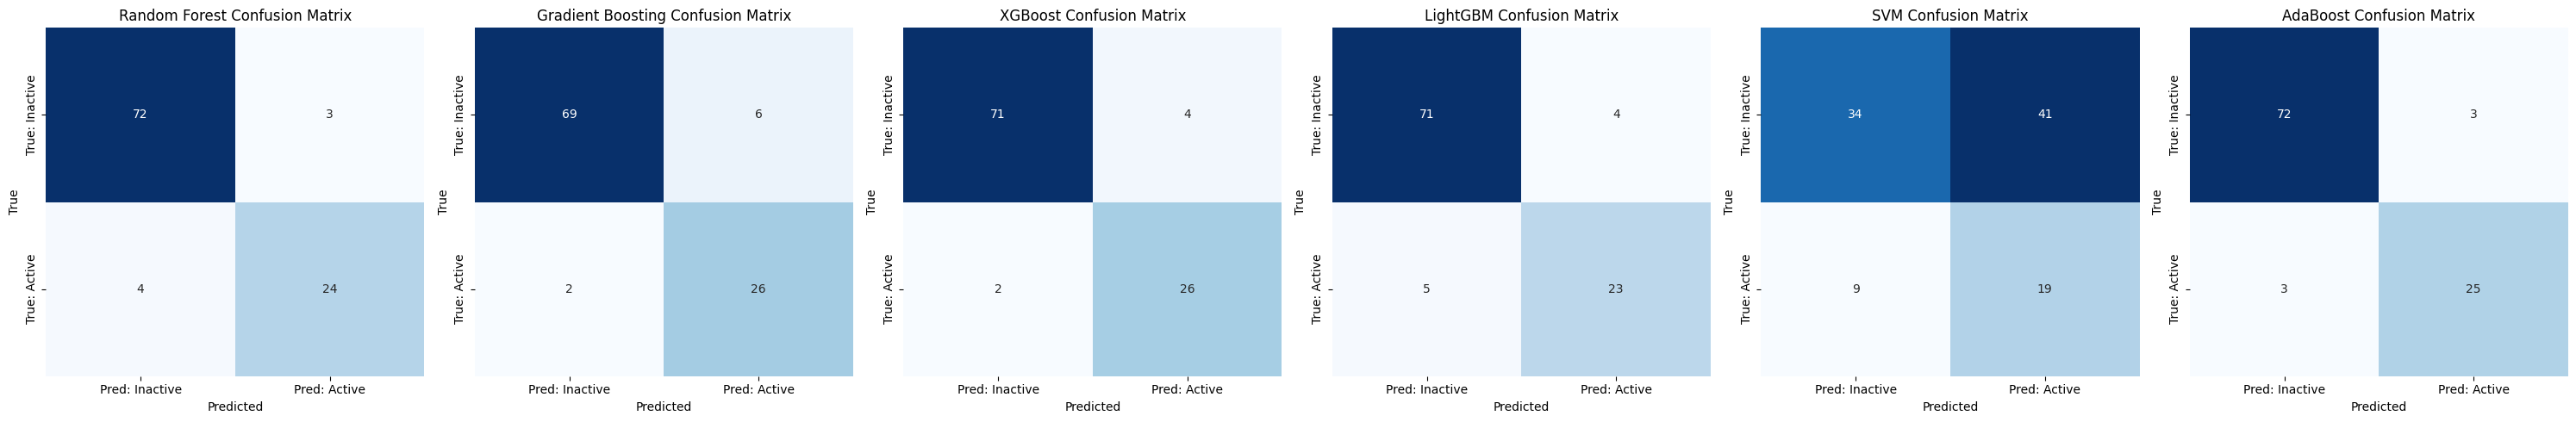

Random Forest CV F1 Score: 0.9111 (+/- 0.0212)
Gradient Boosting CV F1 Score: 0.8840 (+/- 0.0421)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:31:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:31:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:31:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:31:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:31:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost CV F1 Score: 0.8943 (+/- 0.0174)
[LightGBM] [Info] Number of positive: 88, number of negative: 88
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000093 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 783
[LightGBM] [Info] Number of data points in the train set: 176, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import (
    classification_report, accuracy_score, confusion_matrix,
    roc_auc_score, average_precision_score, roc_curve, precision_recall_curve
)
from sklearn.model_selection import cross_val_score

# Load test data
X_test = pd.read_csv('/content/drive/MyDrive/KP/KP balance/X_test.csv')
y_test = pd.read_csv('/content/drive/MyDrive/KP/KP balance/y_test.csv').squeeze()

# Store metrics
metrics_test = {
    'Model': [],
    'Accuracy': [],
    'ROC AUC': [],
    'PR AUC': []
}

# Set up plots for ROC and PR curves
fig_curve, (ax_roc, ax_pr) = plt.subplots(1, 2, figsize=(14, 6))
ax_roc.set_title('ROC Curve Comparison')
ax_roc.set_xlabel('False Positive Rate')
ax_roc.set_ylabel('True Positive Rate')

ax_pr.set_title('Precision-Recall Curve Comparison')
ax_pr.set_xlabel('Recall')
ax_pr.set_ylabel('Precision')

# Set up confusion matrix figure
fig_cm, axes_cm = plt.subplots(1, len(models), figsize=(5 * len(models), 5))

if len(models) == 1:
    axes_cm = [axes_cm]  # ensure iterable if only 1 model

# Loop through each model
for idx, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Compute metrics
    acc = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    pr_auc = average_precision_score(y_test, y_prob)

    # Append metrics
    metrics_test['Model'].append(name)
    metrics_test['Accuracy'].append(acc)
    metrics_test['ROC AUC'].append(roc_auc)
    metrics_test['PR AUC'].append(pr_auc)

    print(f"\n{name} Test Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Pred: Inactive', 'Pred: Active'],
                yticklabels=['True: Inactive', 'True: Active'],
                ax=axes_cm[idx])
    axes_cm[idx].set_title(f'{name} Confusion Matrix')
    axes_cm[idx].set_xlabel('Predicted')
    axes_cm[idx].set_ylabel('True')

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    ax_roc.plot(fpr, tpr, label=f'{name} (AUC={roc_auc:.3f})')

    # Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    ax_pr.plot(recall, precision, label=f'{name} (AP={pr_auc:.3f})')

# Final plot adjustments
ax_roc.plot([0, 1], [0, 1], 'k--', label='Random Guess')
ax_roc.legend()
ax_roc.grid(True)

ax_pr.legend()
ax_pr.grid(True)

fig_curve.tight_layout()
fig_cm.tight_layout()
plt.show()

# Optional: Cross-validation F1 scores on training data
# Ensure X_balanced and y_balanced are defined
try:
    for name, model in models.items():
        scores = cross_val_score(model, X_balanced, y_balanced, cv=5, scoring='f1')
        print(f"{name} CV F1 Score: {scores.mean():.4f} (+/- {scores.std():.4f})")
except NameError:
    print("X_balanced and y_balanced not defined. Skipping CV scores.")

# Summary of metrics
metrics_df = pd.DataFrame(metrics_test)
print("\nSummary of Test Metrics:")
print(metrics_df)


Save Model

In [78]:
import joblib
import os

save_dir = '/content/drive/MyDrive/KP/KP balance/saved_models'
os.makedirs(save_dir, exist_ok=True)

for name, model in best_models.items():
    filename = os.path.join(save_dir, f"{name.replace(' ', '_')}_model.pkl")
    joblib.dump(model, filename)
    print(f"Saved {name} model to {filename}")


Saved Random Forest model to /content/drive/MyDrive/KP/KP balance/saved_models/Random_Forest_model.pkl
Saved Gradient Boosting model to /content/drive/MyDrive/KP/KP balance/saved_models/Gradient_Boosting_model.pkl
Saved XGBoost model to /content/drive/MyDrive/KP/KP balance/saved_models/XGBoost_model.pkl
Saved LightGBM model to /content/drive/MyDrive/KP/KP balance/saved_models/LightGBM_model.pkl


In [79]:
pip install lime


In [80]:
import joblib
import pandas as pd
from lime.lime_tabular import LimeTabularExplainer

# Load model
model = joblib.load('/content/drive/MyDrive/KP/KP balance/saved_models/Random_Forest_model.pkl')

# Load your training data (needed by LIME to understand feature distribution)
X_train = pd.read_csv('/content/drive/MyDrive/KP/KP balance/X_train_balanced.csv')

# Load a sample to explain from test or new data
X_test = pd.read_csv('/content/drive/MyDrive/KP/KP balance/X_test.csv')
instance = X_test.iloc[0].values  # explain first test instance

# Initialize Lime explainer
explainer = LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns.tolist(),
    class_names=['Inactive', 'Active'],
    mode='classification'
)

# Explain prediction for the chosen instance
exp = explainer.explain_instance(
    data_row=instance,
    predict_fn=model.predict_proba,
    num_features=10
)

# Show explanation in notebook
exp.show_in_notebook(show_table=True)

# Or print explanation as text
print(exp.as_list())


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


[('7.93 < Isoelectric_Point <= 9.51', -0.07240858459811128), ('I <= 2.68', -0.05411180606946128), ('P > 8.33', -0.03308337394585003), ('T > 4.55', -0.030389209152979626), ('1.00 < Charge <= 4.00', -0.02903425994197526), ('0.00 < R <= 6.67', -0.026560224374237093), ('0.00 < E <= 6.20', -0.02571586116774548), ('10.34 < K <= 16.79', 0.024531497285022377), ('M > 3.08', -0.01978739704834413), ('W <= 0.00', -0.01964679380010635)]


In [46]:
import joblib
import pandas as pd
from lime.lime_tabular import LimeTabularExplainer

# Load model
model = joblib.load('/content/drive/MyDrive/KP/KP balance/saved_models/Random_Forest_model.pkl')

# Load training data (needed for LIME background)
X_train = pd.read_csv('/content/drive/MyDrive/KP/KP balance/X_train_balanced.csv')

# Load test data
X_test = pd.read_csv('/content/drive/MyDrive/KP/KP balance/X_test.csv')

# Select first test instance
instance = X_test.iloc[0].values

# Initialize LIME explainer
explainer = LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns.tolist(),
    class_names=['Inactive', 'Active'],
    mode='classification'
)

# Predict probabilities for the instance
probs = model.predict_proba(instance.reshape(1, -1))[0]
print(f"Prediction probabilities for sample 0:\nInactive: {probs[0]:.4f}, Active: {probs[1]:.4f}\n")

# Generate LIME explanation
exp = explainer.explain_instance(
    data_row=instance,
    predict_fn=model.predict_proba,
    num_features=10
)

# Show explanation table in notebook (if using Jupyter)
exp.show_in_notebook(show_table=True)

# Or print explanation as list of feature contributions
print("LIME Explanation for sample 0:")
for feature, weight in exp.as_list():
    print(f"{feature}: {weight:.4f}")


Prediction probabilities for sample 0:
Inactive: 0.8000, Active: 0.2000



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


LIME Explanation for sample 0:
7.93 < Isoelectric_Point <= 9.51: -0.0709
I <= 2.68: -0.0467
W <= 0.00: -0.0397
1.00 < Charge <= 4.00: -0.0396
P > 8.33: -0.0349
0.00 < E <= 6.20: -0.0276
25.00 < Length <= 34.00: 0.0248
H <= 0.00: 0.0233
T > 4.55: -0.0226
10.34 < K <= 16.79: 0.0213


In [87]:
import numpy as np
import pandas as pd

# Predict probabilities for all test samples
probs = model.predict_proba(X_test)

# Find indexes where predicted class is Active (class 1)
predicted_classes = np.argmax(probs, axis=1)
active_indexes = np.where(predicted_classes == 1)[0]

if len(active_indexes) == 0:
    print("No test samples predicted as Active.")
else:
    # Choose first test sample predicted as Active
    idx = active_indexes[0]
    print(f"Explaining test sample index: {idx} predicted as Active with probability {probs[idx][1]:.4f}")

    instance = X_test.iloc[idx].values

    # Explain with LIME
    exp = explainer.explain_instance(
        data_row=instance,
        predict_fn=model.predict_proba,
        num_features=10
    )

    # Show explanation plot (Jupyter)
    exp.show_in_notebook(show_table=True)

    # Or print explanation as text
    print("LIME explanation for this Active prediction:")
    for feature, weight in exp.as_list():
        print(f"{feature}: {weight:.4f}")


Explaining test sample index: 3 predicted as Active with probability 0.6200


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


LIME explanation for this Active prediction:
Charge > 6.00: 0.1279
E <= 0.00: 0.0735
Q <= 0.00: 0.0561
I > 9.56: 0.0502
9.51 < Isoelectric_Point <= 10.99: 0.0488
D <= 0.00: 0.0423
W <= 0.00: -0.0359
Length > 34.00: -0.0299
S > 8.42: -0.0246
Molecular_Weight > 3843.09: -0.0183
